# Feature Engineering and Preprocessing
___

#

### Imports and Reading in Data
---

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import wordnet 
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('stopwords')

pk = pd.read_csv('data/POKER_cleaned.csv')
dj = pd.read_csv('data/DADJOKES_cleaned.csv')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preetsekhon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
pk.shape

(6778, 3)

In [53]:
dj.shape

(9713, 3)

In [54]:
#Combining Data Sets
df = pd.concat([pk, dj])

In [55]:
df.shape

(16491, 3)

In [56]:
pk.head(2)

,Unnamed: 0,text,subreddit
0,1,best poker content for 6 max zone poker if you...,poker
1,2,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker


In [57]:
dj.head(2)

,Unnamed: 0,text,subreddit
0,0,what is terrible homework called? workshit.,dadjokes
1,1,what device does the army use to find good sol...,dadjokes


In [58]:
df.head(2)

,Unnamed: 0,text,subreddit
0,1,best poker content for 6 max zone poker if you...,poker
1,2,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker


In [59]:
#Dropping Row
pk.drop(['Unnamed: 0'], axis = 1, inplace=True)
dj.drop(['Unnamed: 0'], axis = 1, inplace=True)
df.drop(['Unnamed: 0'], axis = 1, inplace=True)

#

### Tokenizing and Sentiment Intensity Analyzer
---

In [61]:
#Tokenizing
pk['tokenized_text'] = pk['text'].apply(word_tokenize)
dj['tokenized_text'] = dj['text'].apply(word_tokenize)
df['tokenized_text'] = df['text'].apply(word_tokenize)

#Instantiating 
sent = SentimentIntensityAnalyzer()

#Creating Sentiment Columns and Sentiment For Loop

pk['neg'] = 0
pk['pos'] = 0
pk['neu'] = 0
pk['compound'] = 0

for row in pk.iterrows():
    idx, values = row
    sentiments = sent.polarity_scores(values['text'])
    pk.loc[idx, 'neg'] = sentiments['neg']
    pk.loc[idx, 'pos'] = sentiments['pos']
    pk.loc[idx, 'neu'] = sentiments['neu']
    pk.loc[idx, 'compound'] = sentiments['compound']

    
dj['neg'] = 0
dj['pos'] = 0
dj['neu'] = 0
dj['compound'] = 0

for row in dj.iterrows():
    idx, values = row
    sentiments = sent.polarity_scores(values['text'])
    dj.loc[idx, 'neg'] = sentiments['neg']
    dj.loc[idx, 'pos'] = sentiments['pos']
    dj.loc[idx, 'neu'] = sentiments['neu']
    dj.loc[idx, 'compound'] = sentiments['compound']

    
df['neg'] = 0
df['pos'] = 0
df['neu'] = 0
df['compound'] = 0

for row in df.iterrows():
    idx, values = row
    sentiments = sent.polarity_scores(values['text'])
    df.loc[idx, 'neg'] = sentiments['neg']
    df.loc[idx, 'pos'] = sentiments['pos']
    df.loc[idx, 'neu'] = sentiments['neu']
    df.loc[idx, 'compound'] = sentiments['compound']

In [62]:
pk.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound
0,best poker content for 6 max zone poker if you...,poker,"[best, poker, content, for, 6, max, zone, poke...",0.0,0.182,0.818,0.7964
1,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker,"[4♦️5♦️, [, view, poll, ], (, https, :, //www....",0.0,0.000,1.000,0.0000


In [63]:
dj.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound
0,what is terrible homework called? workshit.,dadjokes,"[what, is, terrible, homework, called, ?, work...",0.383,0.000,0.617,-0.4767
1,what device does the army use to find good sol...,dadjokes,"[what, device, does, the, army, use, to, find,...",0.000,0.209,0.791,0.4404


In [64]:
df.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound
0,best poker content for 6 max zone poker if you...,poker,"[best, poker, content, for, 6, max, zone, poke...",0.383,0.000,0.617,-0.4767
1,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker,"[4♦️5♦️, [, view, poll, ], (, https, :, //www....",0.000,0.209,0.791,0.4404


#

### Lemmatizing
___

In [65]:
#Instantiating
lemmatizer = WordNetLemmatizer()


def pos_tag_converter(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:                    
        return None

In [66]:
def lemmatize(sentence):
    token = RegexpTokenizer(r'[\w\'\']+')
    nltk_tag = nltk.pos_tag(token.tokenize(sentence.lower()))
    wordnet_tag = map(lambda x: (x[0], pos_tag_converter(x[1])), nltk_tag)
    
    lem_words = []
    for word, tag in wordnet_tag:
            if tag is None:                        
                 lem_words.append(word)
            else:
                lem_words.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lem_words)

In [67]:
pk['lemma_text'] = pk['text'].apply(lemmatize)
dj['lemma_text'] = dj['text'].apply(lemmatize)
df['lemma_text'] = df['text'].apply(lemmatize)

In [68]:
pk.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound,lemma_text
0,best poker content for 6 max zone poker if you...,poker,"[best, poker, content, for, 6, max, zone, poke...",0.0,0.182,0.818,0.7964,best poker content for 6 max zone poker if you...
1,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker,"[4♦️5♦️, [, view, poll, ], (, https, :, //www....",0.0,0.000,1.000,0.0000,4 5 view poll http www reddit com poll z4z3hz


In [69]:
dj.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound,lemma_text
0,what is terrible homework called? workshit.,dadjokes,"[what, is, terrible, homework, called, ?, work...",0.383,0.000,0.617,-0.4767,what be terrible homework call workshit
1,what device does the army use to find good sol...,dadjokes,"[what, device, does, the, army, use, to, find,...",0.000,0.209,0.791,0.4404,what device do the army use to find good soldi...


In [70]:
df.head(2)

,text,subreddit,tokenized_text,neg,pos,neu,compound,lemma_text
0,best poker content for 6 max zone poker if you...,poker,"[best, poker, content, for, 6, max, zone, poke...",0.383,0.000,0.617,-0.4767,best poker content for 6 max zone poker if you...
1,4♦️5♦️ \n\n[view poll](https://www.reddit.com/...,poker,"[4♦️5♦️, [, view, poll, ], (, https, :, //www....",0.000,0.209,0.791,0.4404,4 5 view poll http www reddit com poll z4z3hz


# 

### CountVectorizer

In [71]:
#instantiating count vectorizer 
cvec=CountVectorizer(stop_words='english')

#Instantiating Stopwords and adding additional words added to stopwords list after initial word count EDA
nltk.download('stopwords')
stopwords = stopwords.words('english')
stop_list = ["dad","poker", "say", "joke"] 
stpwrd = nltk.corpus.stopwords.words('english')
stpwrd.extend(stop_list)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/preetsekhon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [72]:
#Count Vectorizing each DF, separately, for EDA
pk_cvec = cvec.fit_transform(pk['lemma_text'])
pk_cvec.todense()
words_pk = pd.DataFrame(pk_cvec.todense(), columns = cvec.get_feature_names_out())

dj_cvec = cvec.fit_transform(dj['lemma_text'])
dj_cvec.todense()
words_dj = pd.DataFrame(dj_cvec.todense(), columns = cvec.get_feature_names_out())

df_cvec = cvec.fit_transform(df['lemma_text'])
df_cvec.todense()
words_df = pd.DataFrame(df_cvec.todense(), columns = cvec.get_feature_names_out())

#

### EDA
___

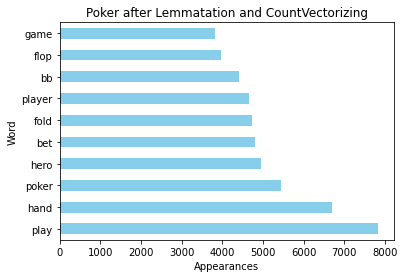

In [73]:
#Word Counts and Saving Plot
words_pk.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = "skyblue")

plt.ylabel('Word')
plt.xlabel('Appearances')
plt.title('Poker after Lemmatation and CountVectorizing')

plt.savefig('./visuals/pk_wc.jpeg', dpi=300, bbox_inches = "tight")
plt.show();

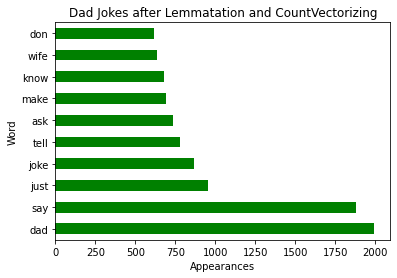

In [74]:
#Word Counts and Saving Plot
words_dj.sum().sort_values(ascending=False).head(10).plot(kind='barh', color = "green")

plt.ylabel('Word')
plt.xlabel('Appearances')
plt.title('Dad Jokes after Lemmatation and CountVectorizing')

plt.savefig('./visuals/dj_wc.jpeg', dpi=300, bbox_inches = "tight")
plt.show();

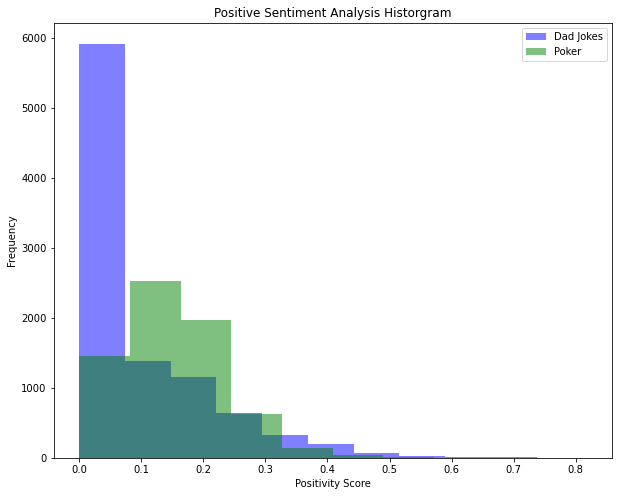

In [75]:
#Positive Sentiment Analysis Historgram and Saving Plot
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('Positive Sentiment Analysis Historgram')
plt.ylabel('Frequency')
plt.xlabel('Positivity Score')
plt.legend(['Dad Jokes','Poker'])

plt.hist(dj['pos'], color = "blue", alpha = .5, label = 'Dad Jokes')
plt.hist(pk['pos'], color = "green", alpha = .5, label = 'Poker')

ax.legend()
plt.savefig('./visuals/pos_his.jpeg', dpi=300, bbox_inches = "tight")
plt.show()

NameError: name 'x' is not defined

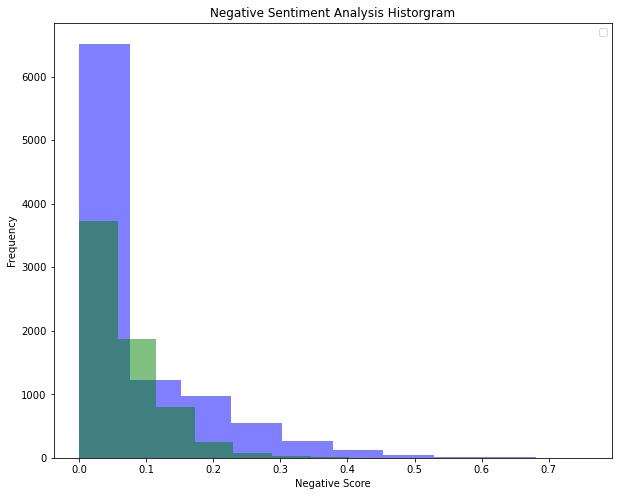

In [76]:
#Negative Sentiment Analysis Historgram and Saving Plot
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('Negative Sentiment Analysis Historgram')
plt.ylabel('Frequency')
plt.xlabel('Negative Score')
plt.legend(['Dad Jokes','Poker'])

plt.hist(dj['neg'], color = "blue", alpha = .5, label = 'Dad Jokes')
plt.hist(pk['neg'], color = "green", alpha = .5, label = 'Poker')

for index,data in enumerate(x):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=20))
plt.tight_layout()


ax.legend()
plt.savefig('visuals/neg_his.jpeg',dpi=300, bbox_inches = "tight")
plt.show()


In [ ]:
#Neutral Sentiment Analysis Historgram and Saving Plot
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('Neutral Sentiment Analysis Historgram')
plt.ylabel('Frequency')
plt.xlabel('Neutral Score')
plt.legend(['Dad Jokes','Poker'])

plt.hist(dj['neu'], color = "blue", alpha = .5, label = 'Dad Jokes')
plt.hist(pk['neu'], color = "green", alpha = .5, label = 'Poker')

ax.legend()
plt.savefig('visuals/neu_his.jpeg',dpi=300, bbox_inches = "tight")
plt.show()



In [ ]:
#Compound Sentiment Analysis Historgram and Saving Plot
fig = plt.figure(figsize = (10,8))
ax = fig.gca()

plt.title('Compound Sentiment Analysis Historgram')
plt.ylabel('Frequency')
plt.xlabel('Compound Score')
plt.legend(['Dad Jokes','Poker'])

plt.hist(dj['compound'], color = "blue", alpha = .5, label = 'Dad Jokes')
plt.hist(pk['compound'], color = "green", alpha = .5, label = 'Poker')

ax.legend()
plt.savefig('visuals/compound_his.jpeg',dpi=300, bbox_inches = "tight")
plt.show()



#

### Preprocessing

In [ ]:
df.head(2)

In [ ]:
#Binarizing Target Column and Dropping Old Column 
df['poker'] = df['subreddit'].map({'dadjokes': 0, 'poker': 1})
df.drop(['subreddit'], axis = 1, inplace = True)

df.head(2)

In [ ]:
#Character Count Column Function

def get_char_count(column, new_column='char_count'):
    df[new_column] = df[column].apply(lambda x: sum([len(item) for item in x]))
    return [new_column]

get_char_count('text')

In [ ]:
df.head(2)

In [ ]:
#Word Count Column Function

def get_word_count(self, new_column='word_count'):
    df['word_count'] = df['lemma_text'].apply(lambda x: len(str(x).split(' ')))
    return df['word_count']

get_word_count('lemma_text')

In [ ]:
df.head(2)

In [ ]:
#Dropping Processed Columns
df = df[['neg', 'neu', 'pos', 'compound', 'char_count', 'word_count', 'lemma_text', 'poker']]

df.head(2)

In [ ]:
df.head(2)

### Cleaned Data Set Saved to Data Folder
---

In [ ]:
df.to_csv('./data/df.csv')